<a href="https://www.kaggle.com/code/pratikpal1/titanic-data-set-logistic-regression?scriptVersionId=103233115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('../input/titanicdataset-traincsv/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

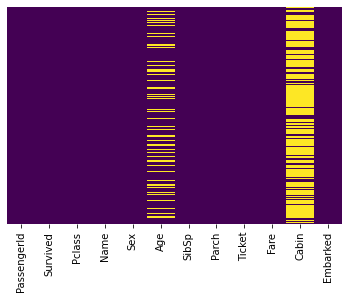

In [4]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False,cmap = 'viridis')

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

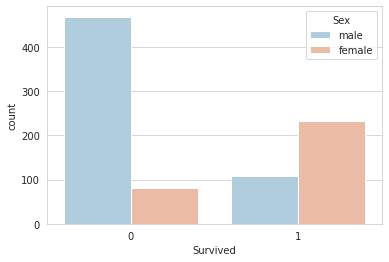

In [6]:
sns.countplot(x='Survived', hue = 'Sex', palette ='RdBu_r', data = train)

#### Overwhelming majority of men did not survive

<AxesSubplot:xlabel='Survived', ylabel='count'>

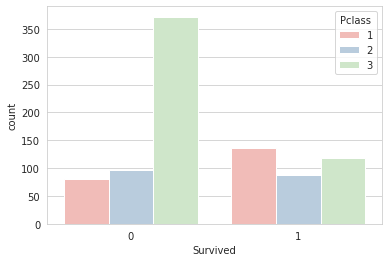

In [7]:
sns.countplot(x='Survived', hue = 'Pclass', palette ='Pastel1', data = train)

#### Passengers from the 3rd class had the highest fatality rates

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


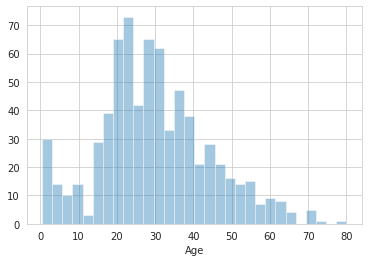

In [8]:
sns.distplot(train['Age'].dropna(),bins =30,kde = False);

#### Children, young adults and middle aged people fromed the bulk of the passengers

<AxesSubplot:xlabel='SibSp', ylabel='count'>

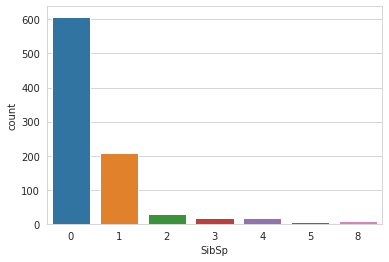

In [9]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

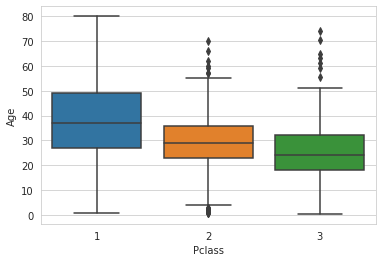

In [10]:
sns.boxplot(x='Pclass', y='Age', data= train)

# Data Cleaning

In [11]:
class1_mean_age= train[train['Pclass'] == 1]['Age'].mean()
class2_mean_age= train[train['Pclass'] == 2]['Age'].mean()
class3_mean_age= train[train['Pclass'] == 3]['Age'].mean()

#### Getting the average age for each class of the passengers

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return class1_mean_age
        elif Pclass == 2:
            return class2_mean_age
        else:
            return class3_mean_age
    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis =1)

<AxesSubplot:>

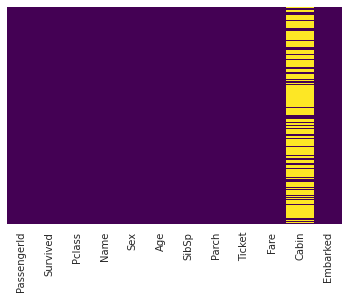

In [14]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False,cmap = 'viridis')

#### Droping the Cabin column as there is too many missing data

In [15]:
train.drop('Cabin', axis=1,inplace = True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
train.dropna(inplace=True)

<AxesSubplot:>

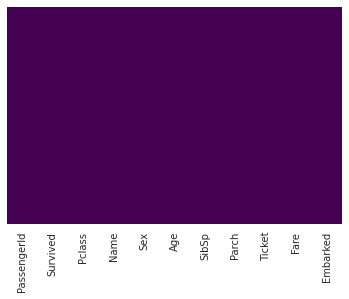

In [18]:
sns.heatmap(train.isnull(),yticklabels = False,cbar= False,cmap = 'viridis')

#### Converting categorical parameters into numberical columns through the use of dummy variables

In [19]:
sex= pd.get_dummies(train['Sex'], drop_first = True)

In [20]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [21]:
train= pd.concat([train,sex,embark], axis =1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


#### Droping the columns that will not be used

In [23]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis =1,inplace =True)

In [24]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
X = train.drop('Survived',axis =1)
y = train['Survived']

X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [26]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



#### Printing the confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]])